<a href="https://colab.research.google.com/github/SChiu-project/CUSCS-m3/blob/main/Class3_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines

The advantages of support vector machines are:

- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:
- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

## Simple Classification

In [ ]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
svc = svm.SVC()
svc.fit(X, y)

SVC()

In [ ]:
svc.predict([[2., 2.]])

array([1])

In [ ]:
# get support vectors
svc.support_vectors_

array([[0., 0.],
       [1., 1.]])

In [ ]:
# get indices of support vectors
svc.support_

array([0, 1], dtype=int32)

In [ ]:
# get number of support vectors for each class
svc.n_support_

array([1, 1], dtype=int32)

## Multi-class classification

SVC and NuSVC implement the “one-versus-one” approach for multi-class classification. In total, n_classes * (n_classes - 1) / 2 classifiers are constructed and each one trains data from two classes. To provide a consistent interface with other classifiers, the decision_function_shape option allows to monotonically transform the results of the “one-versus-one” classifiers to a “one-vs-rest” decision function of shape (n_samples, n_classes).

In [ ]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, Y)

SVC(decision_function_shape='ovo')

In [ ]:
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes: 4*3/2 = 6

6

In [ ]:
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes

4

## Iris

### use iris dataset to work with svc

Comparison of different linear SVM classifiers on a 2D projection of the iris dataset. We only consider the first 2 features of this dataset:

- Sepal length
- Sepal width

This example shows how to plot the decision surface for four SVM classifiers with different kernels.

The linear models LinearSVC() and SVC(kernel='linear') yield slightly different decision boundaries. This can be a consequence of the following differences:

- LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.
- LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.

Both linear models have linear decision boundaries (intersecting hyperplanes) while the non-linear kernel models (polynomial or Gaussian RBF) have more flexible non-linear decision boundaries with shapes that depend on the kind of kernel and its parameters.

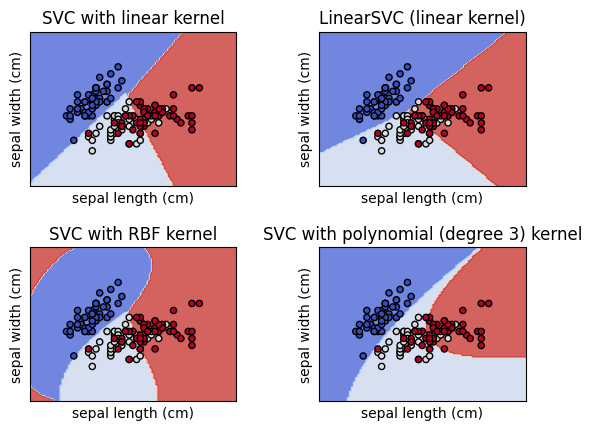

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # correctness: SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C), # gamma means 當 Gamma 較小時，樣本之間的距離影響較大，此時模型的複雜度相對較低，容易出現欠擬合現象；當 Gamma 較大時，樣本之間的距離影響較小，此時模型的複雜度相對較高，容易出現過擬合現象
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## Random dataset

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
X, y = make_classification(n_features = 4, random_state = 0)
svc = LinearSVC(dual = False, random_state = 0, penalty = 'l1',tol = 1e-5)
svc.fit(X, y)

LinearSVC(dual=False, penalty='l1', random_state=0, tol=1e-05)

In [ ]:
print(X)
print(y)

[[-7.15602562e-02  2.29553900e-01  2.16543447e-01  6.52739792e-02]
 [-4.03257104e-01  2.00618406e+00  2.02751248e+00  8.50891944e-01]
 [-1.13058206e+00 -2.02959251e-02 -7.10233633e-01 -1.44099108e+00]
 [ 1.83324682e-01 -7.74610354e-01 -7.66054695e-01 -2.93668633e-01]
 [-2.86920000e-01 -7.16952984e-01 -9.86585088e-01 -8.48214735e-01]
 [-2.56042975e+00  4.02232337e-01 -1.10074198e+00 -2.95958826e+00]
 [ 4.22341441e-01 -2.03911440e+00 -2.05321581e+00 -8.49123046e-01]
 [-5.09792713e-01  4.92658944e-01  2.48206729e-01 -3.09590732e-01]
 [ 7.21669496e-01 -1.12155664e+00 -8.31839865e-01  1.50742097e-01]
 [-9.86132567e-01  1.71053103e+00  1.33828180e+00 -8.53410903e-02]
 [-7.23168038e-02 -7.73668334e-01 -9.20383253e-01 -6.15748704e-01]
 [ 4.55946498e-01 -4.57868762e-01 -2.41527100e-01  2.65199620e-01]
 [ 3.93906076e-01  3.90247346e-01  6.81520677e-01  7.61804328e-01]
 [ 2.03196825e+00  8.40398655e-01  2.18718140e+00  3.13482383e+00]
 [ 4.58931008e-02 -2.61403392e-01 -2.68225264e-01 -1.19266118e

In [ ]:
# the input is 2-dimenions so using [[]]
svc.predict([[0,0,0,0]])

array([1])

In [ ]:
svc.coef_

array([[0.        , 0.        , 0.91214599, 0.22630641]])

In [ ]:
svc.intercept_

array([0.26860191])

## Breast cancer

### use sklearn breast cancer dataset

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
dataset = datasets.load_breast_cancer()

### Explore data

In [ ]:
# print the names of the 13 features
print("Features: ", dataset.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", dataset.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [ ]:
dataset.data.shape

(569, 30)

In [ ]:
X = dataset.data
print(X[:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [ ]:
y = dataset.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

### Split data

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

### Build and train model

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
predict = clf.predict(X_test)

### Evaluate the Model

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predict))

Accuracy: 0.9649122807017544


In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, predict))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, predict))

Precision: 0.9811320754716981
Recall: 0.9629629629629629


## SVC tips

- Avoiding data copy: For SVC, SVR, NuSVC and NuSVR, if the data passed to certain methods is not C-ordered contiguous and double precision, it will be copied before calling the underlying C implementation. You can check whether a given numpy array is C-contiguous by inspecting its flags attribute.

- For LinearSVC (and LogisticRegression) any input passed as a numpy array will be copied and converted to the liblinear internal sparse data representation (double precision floats and int32 indices of non-zero components). If you want to fit a large-scale linear classifier without copying a dense numpy C-contiguous double precision array as input, we suggest to use the SGDClassifier class instead. The objective function can be configured to be almost the same as the LinearSVC model.

- Kernel cache size: For SVC, SVR, NuSVC and NuSVR, the size of the kernel cache has a strong impact on run times for larger problems. If you have enough RAM available, it is recommended to set cache_size to a higher value than the default of 200(MB), such as 500(MB) or 1000(MB).

- Setting C: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it: decreasing C corresponds to more regularization.

- LinearSVC and LinearSVR are less sensitive to C when it becomes large, and prediction results stop improving after a certain threshold. Meanwhile, larger C values will take more time to train, sometimes up to 10 times longer, as shown in [11].

- Support Vector Machine algorithms are not scale invariant, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results. This can be done easily by using a Pipeline:

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC())

- Regarding the shrinking parameter, quoting [12]: We found that if the number of iterations is large, then shrinking can shorten the training time. However, if we loosely solve the optimization problem (e.g., by using a large stopping tolerance), the code without using shrinking may be much faster

- Parameter nu in NuSVC/OneClassSVM/NuSVR approximates the fraction of training errors and support vectors.

- In SVC, if the data is unbalanced (e.g. many positive and few negative), set class_weight='balanced' and/or try different penalty parameters C.

- Randomness of the underlying implementations: The underlying implementations of SVC and NuSVC use a random number generator only to shuffle the data for probability estimation (when probability is set to True). This randomness can be controlled with the random_state parameter. If probability is set to False these estimators are not random and random_state has no effect on the results. The underlying OneClassSVM implementation is similar to the ones of SVC and NuSVC. As no probability estimation is provided for OneClassSVM, it is not random.

- The underlying LinearSVC implementation uses a random number generator to select features when fitting the model with a dual coordinate descent (i.e when dual is set to True). It is thus not uncommon to have slightly different results for the same input data. If that happens, try with a smaller tol parameter. This randomness can also be controlled with the random_state parameter. When dual is set to False the underlying implementation of LinearSVC is not random and random_state has no effect on the results.

- Using L1 penalization as provided by LinearSVC(penalty='l1', dual=False) yields a sparse solution, i.e. only a subset of feature weights is different from zero and contribute to the decision function. Increasing C yields a more complex model (more features are selected). The C value that yields a “null” model (all weights equal to zero) can be calculated using l1_min_c.

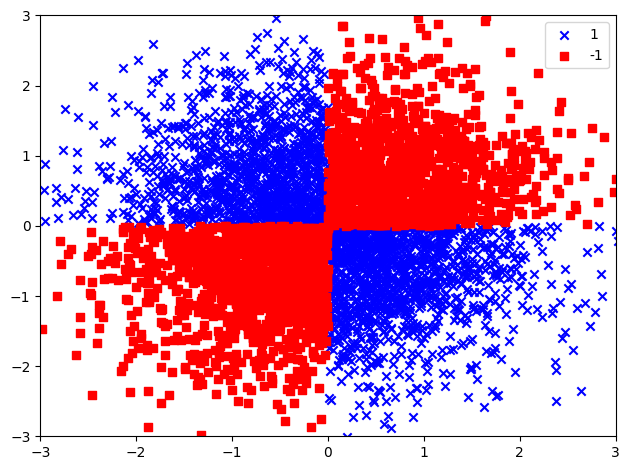

In [ ]:
# XOR

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(10)
X_xor = np.random.randn(5000, 5)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('images/03_12.png', dpi=300)
plt.show()